# Russian demographics 2010-2017

Dataset has 2380 rows and 7 columns. Keys for columns:

- "year" - year (1990-2017)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "npg" - natural population growth by 1000 people. Calculating as the difference between birth rate and death rate
- "birth_rate" - number of births by 1000 people
- "death_rate" - number of deaths by 1000 people
- "gdw" - general demographic weight (how many people of non-working age account for 100 people of working age). Working age for men 16-60 years, for women 16-55 years
- "urbanization" - % of urban population

In [1]:
# Import pandas, numpty, matplotlib, scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(np.NaN)  # just to use numpy and avoid linting error

nan


In [2]:
# Load the data
data = pd.read_csv('russian-demographics.csv')
print(len(data))
data.head()

2380


,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01


## Initial investigations of the dat

In [3]:
# Find the unique values in the 'year' column
data['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017])

In [4]:
# Find the unique values in the 'region' column
unique_regions = data['region'].unique()
print(f'Number of uniqure regions: {len(unique_regions)}')
display(unique_regions)

# Print the number of elements in unique_regions that have the word 'Oblast' in them
def sum_region_with(region_list, keyword):
    count = 0
    for region in region_list:
        if keyword in region:
            count += 1
    return count

oblast_count = sum_region_with(unique_regions, 'Oblast')
republic_count = sum_region_with(unique_regions, 'Republic')
print(f'Number of regions with "Republic" in their name: {republic_count}')
print(f'Number of regions with "Oblast" in their name: {oblast_count}')

Number of uniqure regions: 85


array(['Republic of Adygea', 'Altai Krai', 'Amur Oblast',
       'Arkhangelsk Oblast', 'Astrakhan Oblast',
       'Republic of Bashkortostan', 'Belgorod Oblast', 'Bryansk Oblast',
       'Republic of Buryatia', 'Vladimir Oblast', 'Volgograd Oblast',
       'Vologda Oblast', 'Voronezh Oblast', 'Republic of Dagestan',
       'Jewish Autonomous Oblast', 'Zabaykalsky Krai', 'Ivanovo Oblast',
       'Republic of Ingushetia', 'Irkutsk Oblast',
       'Kabardino-Balkar Republic', 'Kaliningrad Oblast',
       'Republic of Kalmykia', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Republic of Karelia',
       'Kemerovo Oblast', 'Kirov Oblast', 'Kostroma Oblast',
       'Krasnodar Krai', 'Krasnoyarsk Krai', 'Republic of Crimea',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Republic of Mordovia', 'Moscow', 'Moscow Oblast',
       'Murmansk Oblast', 'Nenets Autonomous Okrug',
       'Nizh

Number of regions with "Republic" in their name: 22
Number of regions with "Oblast" in their name: 47


In [5]:
# Find the range of values in each of the other columns (npg, births, deaths, gdw, urbanization)
data.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization
count,2380.000000,2317.000000,2317.000000,2315.000000,2330.000000,2330.000000
mean,2003.500000,-2.344022,11.549245,13.901382,68.474013,69.148704
std,8.079445,6.064389,3.233035,3.499475,10.453587,13.349880
min,1990.000000,-15.900000,6.200000,3.200000,37.500000,23.630000
25%,1996.750000,-6.200000,9.300000,12.100000,61.380000,62.792500
50%,2003.500000,-3.100000,11.000000,14.100000,68.530000,69.575000
75%,2010.250000,0.700000,13.000000,16.100000,76.895000,77.620000
max,2017.000000,24.800000,29.900000,24.900000,97.530000,100.000000


## Investigate Nizhny Novgorod Oblast

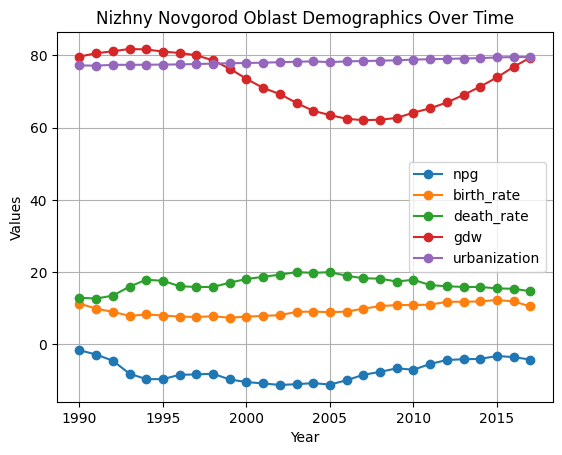

In [6]:
# For Nizhny Novgorod Oblast, plot each column per year
nn_data = data[data['region'] == 'Nizhny Novgorod Oblast']
nn_data.plot(x='year', y=['npg', 'birth_rate', 'death_rate', 'gdw', 'urbanization'], marker='o')
plt.title('Nizhny Novgorod Oblast Demographics Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid()
plt.legend()
plt.show()


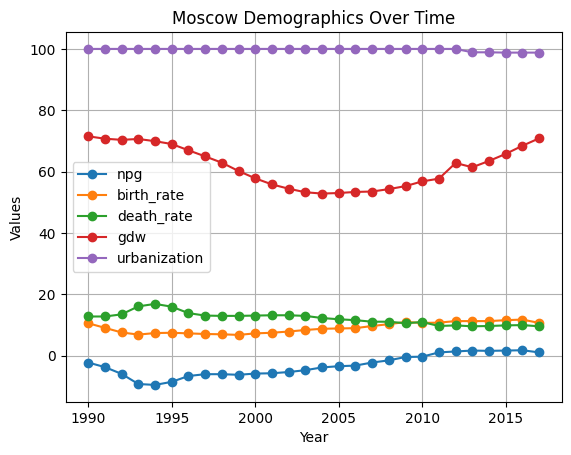

In [7]:
# Write a function that takes a region name as input and plots the demographics for that region
def plot_region_demographics(region_name):
    region_data = data[data['region'] == region_name]
    if region_data.empty:
        print(f'Region "{region_name}" not found in the dataset.')
        return
    region_data.plot(x='year', y=['npg', 'birth_rate', 'death_rate', 'gdw', 'urbanization'], marker='o')
    plt.title(f'{region_name} Demographics Over Time')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
plot_region_demographics('Moscow')

## Investigating GDW

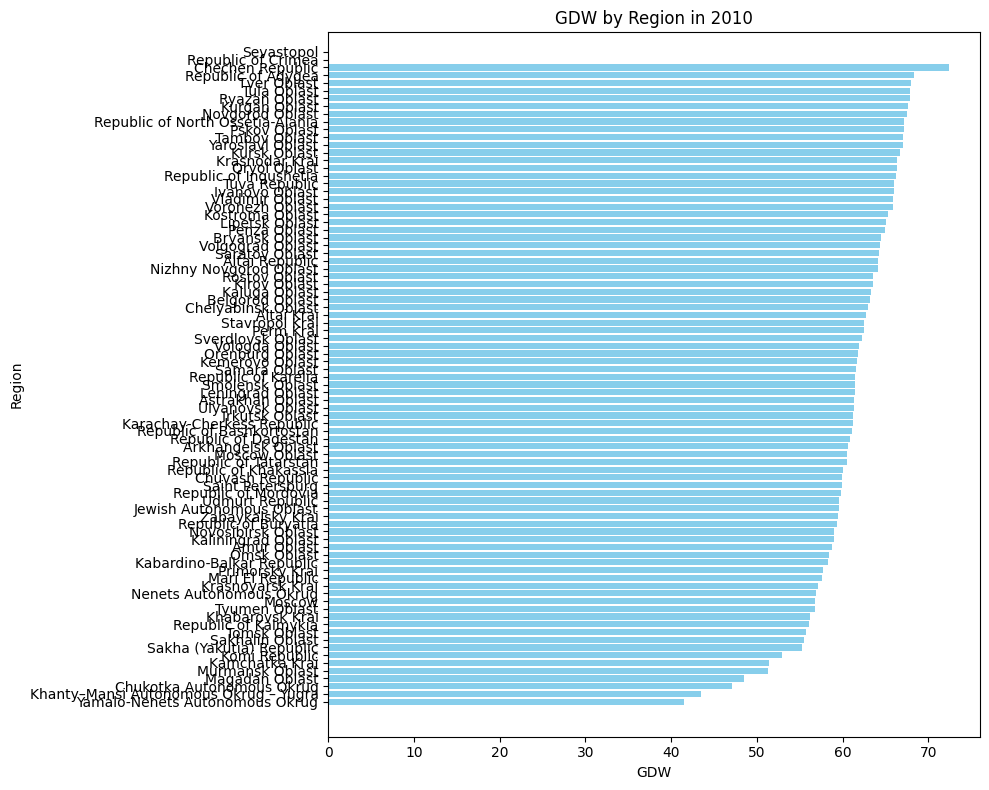

In [8]:
# Plot a bar chart of GDW for all regions in 2010, ordered from lowest to highest
data_2010 = data[data['year'] == 2010]
data_2010_sorted = data_2010.sort_values(by='gdw')
plt.figure(figsize=(10, 8))
plt.barh(data_2010_sorted['region'], data_2010_sorted['gdw'], color='skyblue')
plt.title('GDW by Region in 2010')
plt.xlabel('GDW')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


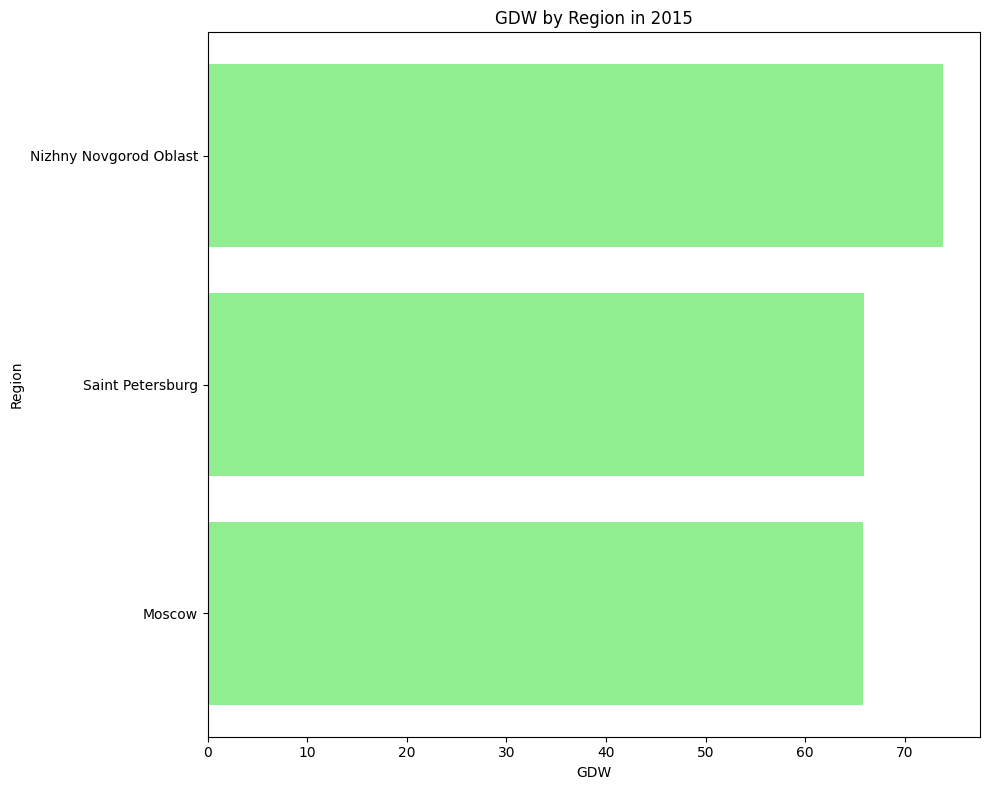

In [9]:
# Write a function that takes a list of region names and a year as input, and plots the GDW for those regions in that year
def plot_gdw_for_regions(region_list, year):
    data_year = data[data['year'] == year]
    data_year_filtered = data_year[data_year['region'].isin(region_list)]
    if data_year_filtered.empty:
        print(f'No data found for the specified regions in the year {year}.')
        return
    data_year_sorted = data_year_filtered.sort_values(by='gdw')
    plt.figure(figsize=(10, 8))
    plt.barh(data_year_sorted['region'], data_year_sorted['gdw'], color='lightgreen')
    plt.title(f'GDW by Region in {year}')
    plt.xlabel('GDW')
    plt.ylabel('Region')
    plt.tight_layout()
    plt.show()
# Example usage
plot_gdw_for_regions(['Moscow', 'Saint Petersburg', 'Nizhny Novgorod Oblast'], 2015)

## More summary statistics

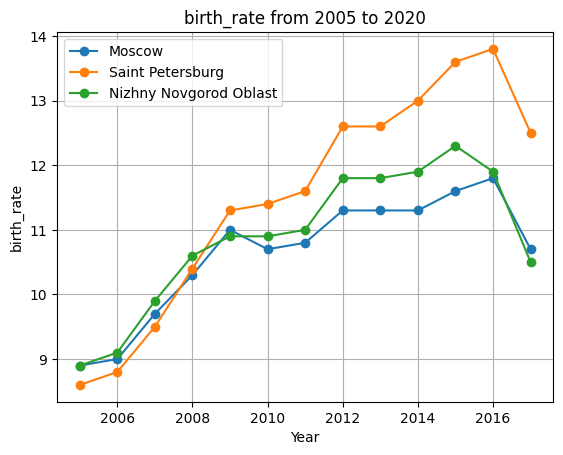

In [10]:
# Write a function that takes a list of regions, a start and end year, and a column name, and plots that column for those regions over that time period
def plot_column_for_regions(region_list, start_year, end_year, column_name):
    data_filtered = data[(data['year'] >= start_year) & (data['year'] <= end_year) & (data['region'].isin(region_list))]
    if data_filtered.empty:
        print(f'No data found for the specified regions between {start_year} and {end_year}.')
        return
    for region in region_list:
        region_data = data_filtered[data_filtered['region'] == region]
        if not region_data.empty:
            plt.plot(region_data['year'], region_data[column_name], marker='o', label=region)
    plt.title(f'{column_name} from {start_year} to {end_year}')
    plt.xlabel('Year')
    plt.ylabel(column_name)
    plt.grid()
    plt.legend()
    plt.show()
# Example usage
plot_column_for_regions(['Moscow', 'Saint Petersburg', 'Nizhny Novgorod Oblast'], 2005, 2020, 'birth_rate')


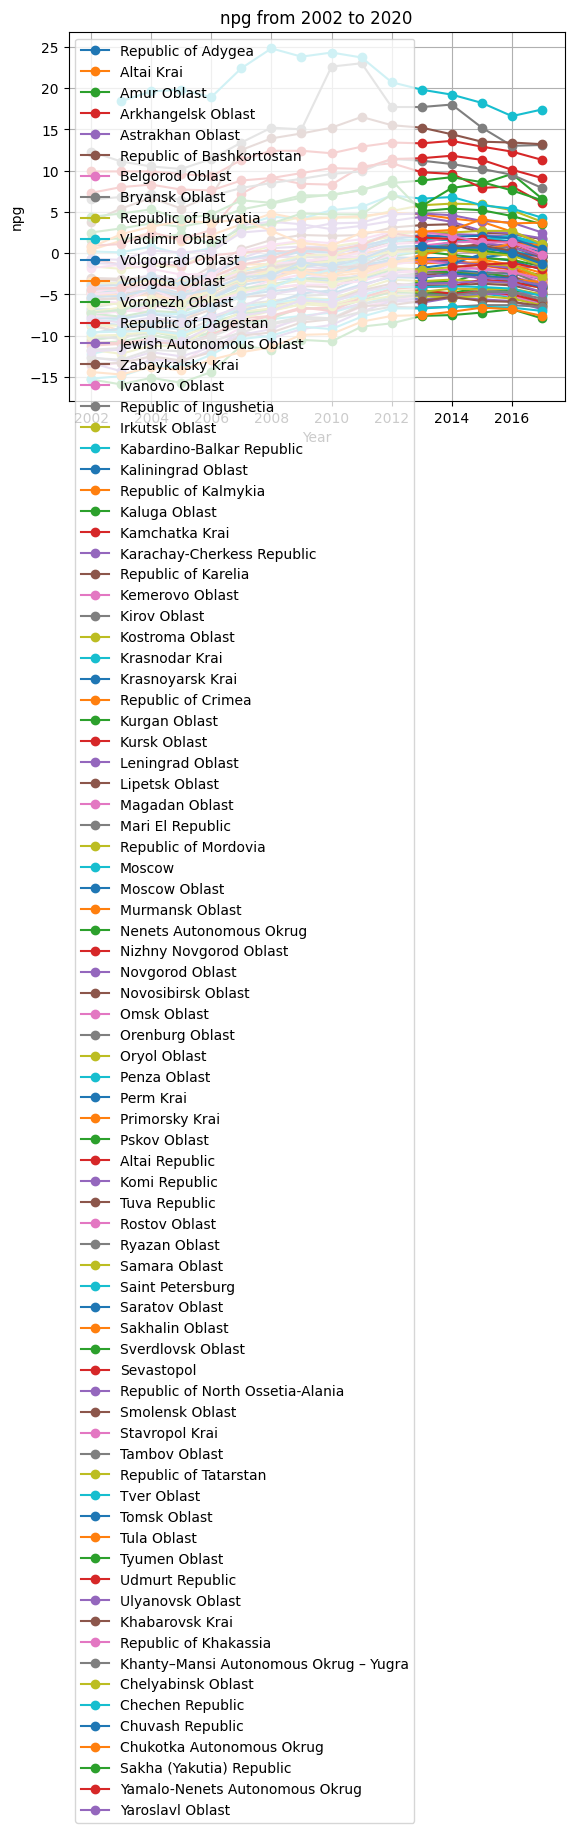

In [12]:
# Run plot column for regions for all regions, all years and each column
for column in ['npg']:
    plot_column_for_regions(unique_regions, 2002, 2020, column)